In [1]:
# lessons 1 to 7
# R code used in Module 1 Linear Regression

# calling libraries

if (!require(Ecdat)) install.packages("Ecdat") #Ecdat: Data Sets for Econometrics
library(Ecdat)

if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

if (!require(ISLR)) install.packages("ISLR")
library(ISLR)

if (!require(GGally)) install.packages("GGally")
library(GGally)

if (!require(car)) install.packages("car")
library(car)

#library(repr)
#options(repr.plot.width=7, repr.plot.height=4)

Loading required package: Ecdat
Loading required package: Ecfun

Attaching package: ‘Ecfun’

The following object is masked from ‘package:base’:

    sign


Attaching package: ‘Ecdat’

The following object is masked from ‘package:datasets’:

    Orange

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: ISLR
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Loading required package: car
Loading required package: carData

Attaching package: ‘carData’

The following object is masked from ‘package:Ecdat’:

    Mroz



In [2]:
# use Housing dataset in the Ecdat package in R

#?Housing

In [3]:
summary(Housing)
str(Housing)
head(Housing,10)

     price           lotsize         bedrooms        bathrms     
 Min.   : 25000   Min.   : 1650   Min.   :1.000   Min.   :1.000  
 1st Qu.: 49125   1st Qu.: 3600   1st Qu.:2.000   1st Qu.:1.000  
 Median : 62000   Median : 4600   Median :3.000   Median :1.000  
 Mean   : 68122   Mean   : 5150   Mean   :2.965   Mean   :1.286  
 3rd Qu.: 82000   3rd Qu.: 6360   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :190000   Max.   :16200   Max.   :6.000   Max.   :4.000  
    stories      driveway  recroom   fullbase  gashw     airco    
 Min.   :1.000   no : 77   no :449   no :355   no :521   no :373  
 1st Qu.:1.000   yes:469   yes: 97   yes:191   yes: 25   yes:173  
 Median :2.000                                                    
 Mean   :1.808                                                    
 3rd Qu.:2.000                                                    
 Max.   :4.000                                                    
    garagepl      prefarea 
 Min.   :0.0000   no :418  
 1st Qu.:0.00

'data.frame':	546 obs. of  12 variables:
 $ price   : num  42000 38500 49500 60500 61000 66000 66000 69000 83800 88500 ...
 $ lotsize : num  5850 4000 3060 6650 6360 4160 3880 4160 4800 5500 ...
 $ bedrooms: num  3 2 3 3 2 3 3 3 3 3 ...
 $ bathrms : num  1 1 1 1 1 1 2 1 1 2 ...
 $ stories : num  2 1 1 2 1 1 2 3 1 4 ...
 $ driveway: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ recroom : Factor w/ 2 levels "no","yes": 1 1 1 2 1 2 1 1 2 2 ...
 $ fullbase: Factor w/ 2 levels "no","yes": 2 1 1 1 1 2 2 1 2 1 ...
 $ gashw   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ airco   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 2 1 1 1 2 ...
 $ garagepl: num  1 0 0 0 0 0 2 0 0 1 ...
 $ prefarea: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
42000,5850,3,1,2,yes,no,yes,no,no,1,no
38500,4000,2,1,1,yes,no,no,no,no,0,no
49500,3060,3,1,1,yes,no,no,no,no,0,no
60500,6650,3,1,2,yes,yes,no,no,no,0,no
61000,6360,2,1,1,yes,no,no,no,no,0,no
66000,4160,3,1,1,yes,yes,yes,no,yes,0,no
66000,3880,3,2,2,yes,no,yes,no,no,2,no
69000,4160,3,1,3,yes,no,no,no,no,0,no
83800,4800,3,1,1,yes,yes,yes,no,no,0,no
88500,5500,3,2,4,yes,yes,no,no,yes,1,no


In [4]:
#table(housing[1:15,],caption='Housing Prices')
h1 <- data.frame(Housing$price, Housing$lotsize, Housing$bedrooms, Housing$bathrms)
head(h1,15)


Housing.price,Housing.lotsize,Housing.bedrooms,Housing.bathrms
42000,5850,3,1
38500,4000,2,1
49500,3060,3,1
60500,6650,3,1
61000,6360,2,1
66000,4160,3,1
66000,3880,3,2
69000,4160,3,1
83800,4800,3,1
88500,5500,3,2


In [5]:
# some useful statistics

pp <- Housing$price
pricesd <- sd(pp)
mean(Housing$price)
median(Housing$price)

lot <- Housing$lotsize
lotsd <- sd(lot)
mean(Housing$lotsize)
median(Housing$lotsize)

res <- cor(h1)
round(res,2)

#res

[1] 68121.6

[1] 62000

[1] 5150.266

[1] 4600

,Housing.price,Housing.lotsize,Housing.bedrooms,Housing.bathrms
Housing.price,1.00,0.54,0.37,0.52
Housing.lotsize,0.54,1.00,0.15,0.19
Housing.bedrooms,0.37,0.15,1.00,0.37
Housing.bathrms,0.52,0.19,0.37,1.00


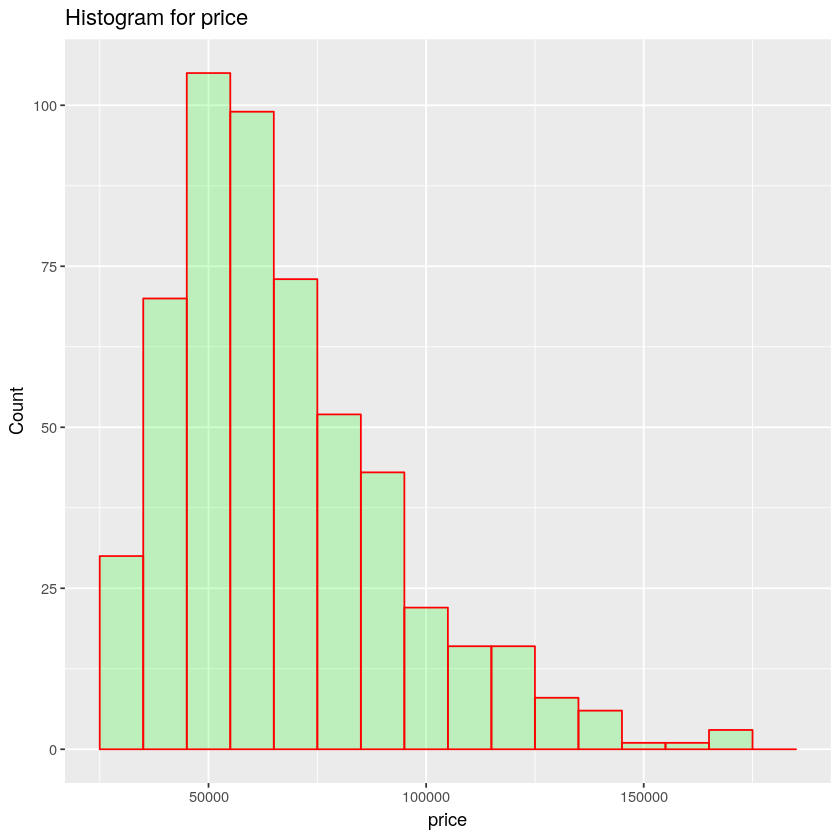

In [20]:
# Plot Histogram of House Prices

ggplot(data=Housing, aes(Housing$price)) + 
geom_histogram(breaks=seq(25000, 190000, by =10000), 
                 col="red", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for price") +
  labs(x="price", y="Count")


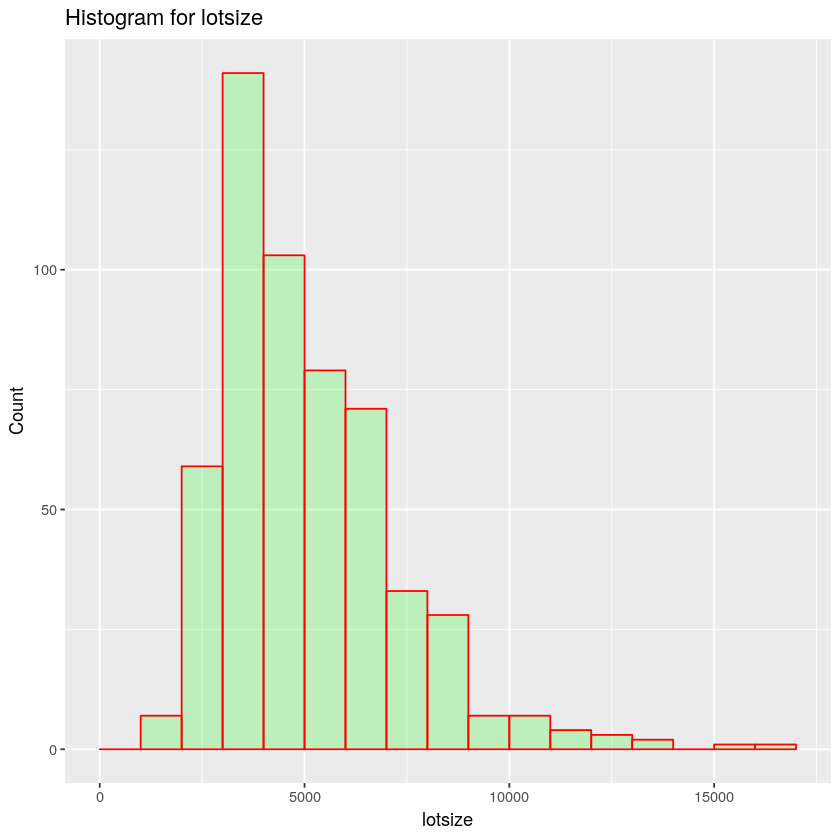

In [7]:
# Plot Histogram of Lotsize

ggplot(data=Housing, aes(Housing$lotsize)) + 
geom_histogram(breaks=seq(0, 17000, by =1000), 
               col="red", 
               fill="green", 
               alpha = .2) + 
labs(title="Histogram for lotsize") +
labs(x="lotsize", y="Count")

 Housing.price    Housing.lotsize Housing.bedrooms Housing.bathrms
 Min.   : 25000   Min.   : 1650   Min.   :1.000    Min.   :1.000  
 1st Qu.: 49125   1st Qu.: 3600   1st Qu.:2.000    1st Qu.:1.000  
 Median : 62000   Median : 4600   Median :3.000    Median :1.000  
 Mean   : 68122   Mean   : 5150   Mean   :2.965    Mean   :1.286  
 3rd Qu.: 82000   3rd Qu.: 6360   3rd Qu.:3.000    3rd Qu.:2.000  
 Max.   :190000   Max.   :16200   Max.   :6.000    Max.   :4.000  

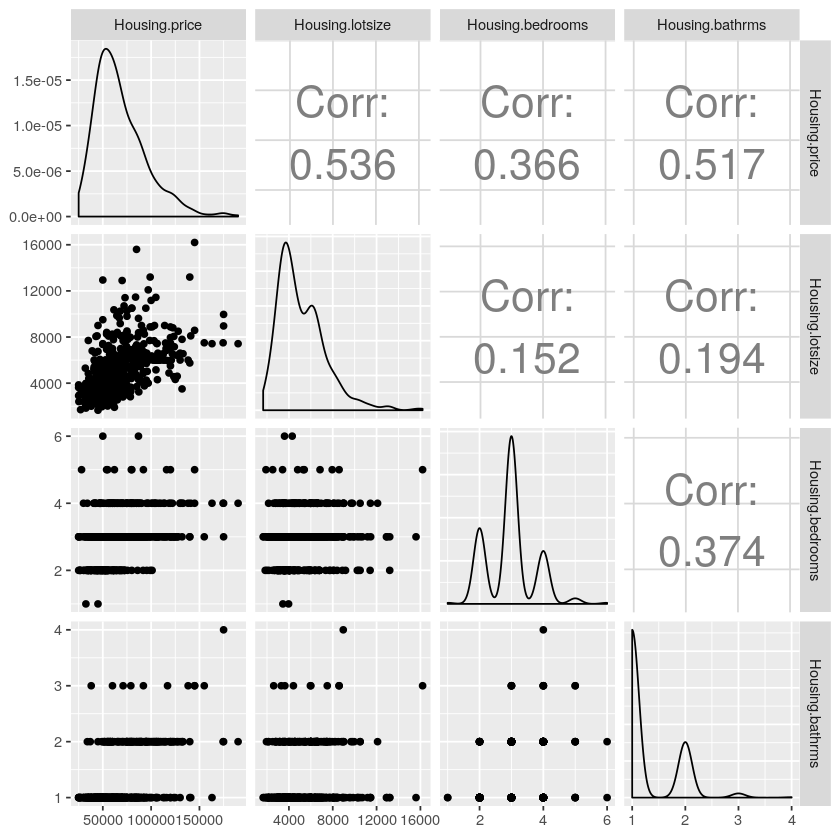

In [8]:
# Using ggpairs to get Correlation matrix along with with scatter plots

summary(h1)
ggpairs(h1, 
        upper = list(continuous = wrap("cor", size = 9))) 


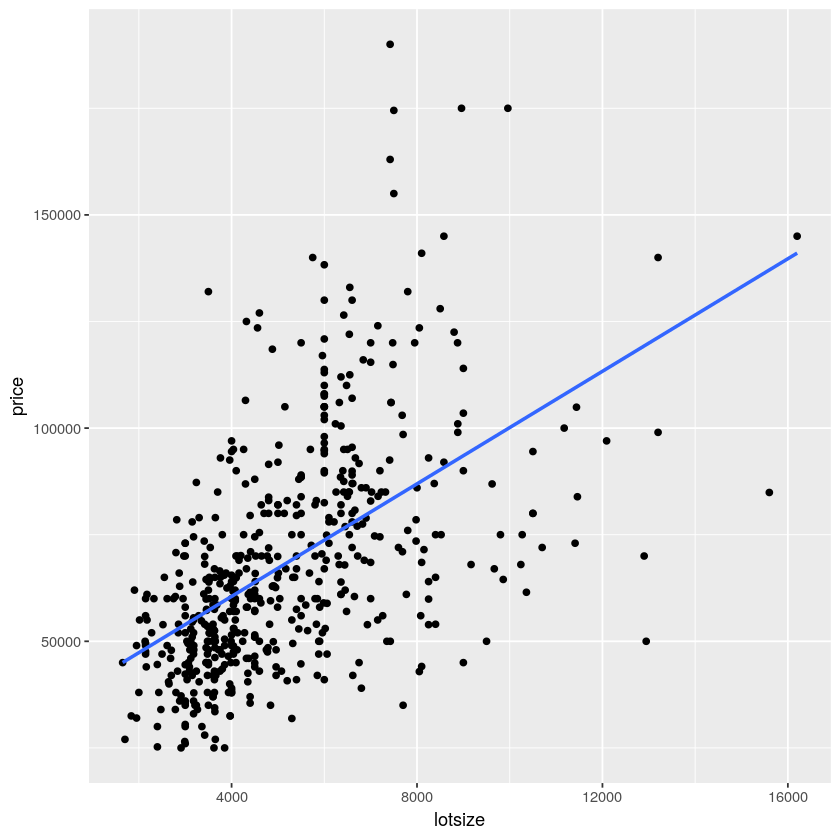

In [18]:
# Scatter Plot of price (y) against lotsize (x), including the linear regression line

ggplot(Housing, aes(x=lotsize, y=price)) + geom_point() +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=FALSE,    # Don't add shaded confidence region
              fullrange=TRUE) # Extend regression lines


In [10]:
# simple linear regression model with lotsize as predictor

a.lm <- lm(formula = price ~ lotsize , data = Housing)

summary(a.lm) # what does this command do?
anova(a.lm)   # what does this command do?



Call:
lm(formula = price ~ lotsize, data = Housing)

Residuals:
   Min     1Q Median     3Q    Max 
-69551 -14626  -2858   9752 106901 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.414e+04  2.491e+03    13.7   <2e-16 ***
lotsize     6.599e+00  4.458e-01    14.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22570 on 544 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2858 
F-statistic: 219.1 on 1 and 544 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
lotsize,1,111558922960,111558922960,219.0558,6.7699e-42
Residuals,544,277043862881,509271807,NA,NA


In [11]:
# create dataframes called new, new2, and new3  

new = data.frame(lotsize=3000)
predict(a.lm, new, interval = "predict")

# 
new2 = data.frame(lotsize=5150)
predict(a.lm, new2, interval = "predict")

new3 = data.frame(lotsize=7300)
predict(a.lm, new3, interval = "predict")


fit,lwr,upr
53932.49,9522.739,98342.25


fit,lwr,upr
68119.84,23750.03,112489.7


fit,lwr,upr
82307.19,37897.46,126716.9


In [12]:
# simple linear regression model with bedroom as predictor

b.lm <- lm(formula = price ~ bedrooms, data = Housing)



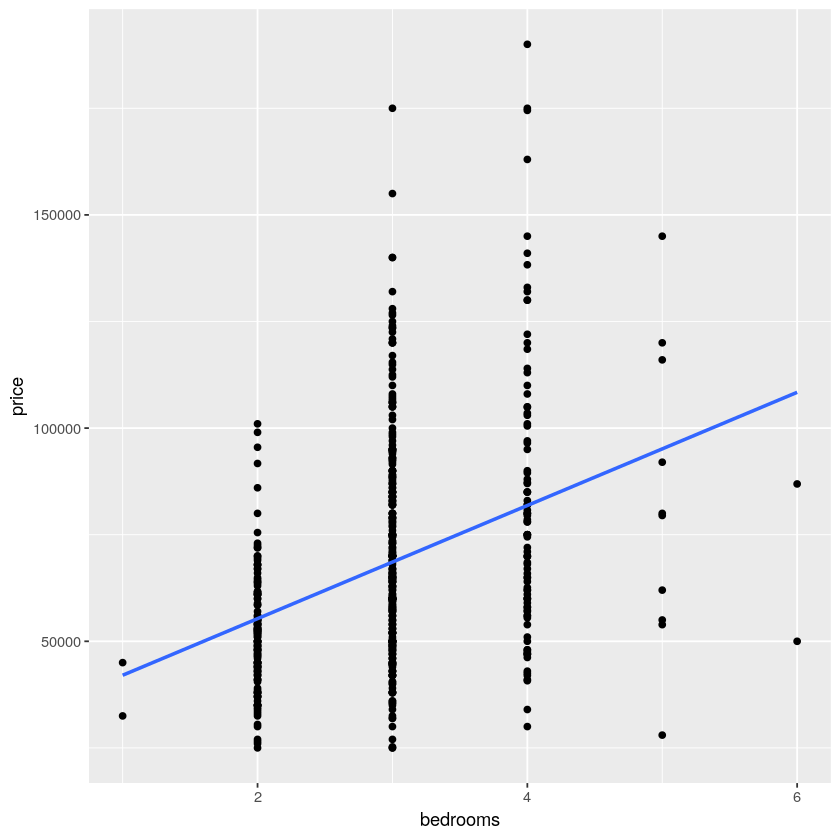

In [13]:
# Scatter Plot of price (y) against bedrooms (x), including the linear regression line

ggplot(Housing, aes(x=bedrooms, y=price)) + geom_point() +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=FALSE,    # Don't add shaded confidence region
              fullrange=TRUE) # Extend regression lines



In [14]:
# Multiple Regression - with two predictors lotsize and bedrooms

ab.lm <- lm(formula = price ~ lotsize + bedrooms, data = Housing)

summary(ab.lm) 
anova(ab.lm)  


Call:
lm(formula = price ~ lotsize + bedrooms, data = Housing)

Residuals:
   Min     1Q Median     3Q    Max 
-65665 -12498  -2075   8970  97205 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.613e+03  4.103e+03   1.368    0.172    
lotsize     6.053e+00  4.243e-01  14.265  < 2e-16 ***
bedrooms    1.057e+04  1.248e+03   8.470 2.31e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21230 on 543 degrees of freedom
Multiple R-squared:  0.3703,	Adjusted R-squared:  0.3679 
F-statistic: 159.6 on 2 and 543 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
lotsize,1,111558922960,111558922960,247.53887,3.138680e-46
bedrooms,1,32328775652,32328775652,71.73454,2.314456e-16
Residuals,543,244715087229,450672352,NA,NA


In [15]:
# making a prediction (interpolation). First create a dataframe with values for the predictors. Then use the predict function.

newdata <- data.frame(lotsize=3000, bedrooms=2)

predict(ab.lm, newdata, interval = "predict")

fit,lwr,upr
44906.37,3077.091,86735.65
